In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import houseprice_functions as hpf
%load_ext autoreload
%autoreload 2

In [3]:
HousePrices = pd.read_csv('data/train.csv')
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
y = np.log(HousePrices['SalePrice'])
X = cleaned_hp.drop(['Id'],axis = 1)

X.head()

,CentralAir,HeatingQC,garage_score,Heating,Electrical,GarageArea,TotalBsmtSF,finishedbsmt,2Types,Basment,...,Ext_Stucco,Ext_WdSdng,Ext_WdShing,House_1.5Fin,House_1.5Unf,House_2.5Fin,House_2.5Unf,House_2Story,House_SFoyer,House_SLvl
0,1,5,6,1,5,548,856,0.824766,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,5,6,1,5,460,1262,0.774960,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,6,1,5,608,920,0.528261,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,4,6,1,5,642,756,0.285714,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,5,6,1,5,836,1145,0.572052,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
ols = linear_model.LinearRegression()
scores = cross_val_score(ols, X, y, cv=10)
predictions = cross_val_predict(ols, X, y, cv=10)
print(
    "RMSE:",
round(np.sqrt(metrics.mean_squared_error(y, predictions)),4)
)

RMSE: 0.1442


In [4]:
ols = linear_model.LinearRegression()
full_model = ols.fit(X,y)
print("beta_1: " + str(np.round(full_model.coef_, 3)))
print("beta_0: " + str(np.round(full_model.intercept_, 3)))
print("RSS: %.2f" % np.sum((full_model.predict(X) - y) ** 2))
print("R^2: %.5f" % full_model.score(X, y))

beta_1: [ 0.055  0.008  0.022  0.057 -0.014  0.     0.     0.05  -0.164 -0.013
 -0.025 -0.072 -0.025  0.064 -0.009 -0.015  0.     0.021  0.041  0.037
  0.019  0.002 -0.263  0.395  0.023  0.013  0.012  0.01   0.    -0.008
 -0.012 -0.082 -0.061 -0.039 -0.07  -0.109  0.01  -0.036  0.074  0.028
 -0.053 -0.058  0.031  0.089  0.059  0.138 -0.045  0.067 -0.015 -0.224
  0.022 -0.015  0.013  0.153  0.196 -0.027 -0.008  0.004  0.054  0.131
  0.212  0.09   0.109 -0.017 -0.027  0.009  0.048 -0.029 -0.086 -0.389
 -0.01   0.004 -0.058 -0.064 -0.033  0.016  0.022 -0.078 -0.065  0.025
  0.014  0.016  0.    -0.068 -0.    -0.003  0.     0.    -0.008  0.043
  0.    -0.028  0.034 -0.213  0.064 -0.087  0.027 -0.044  0.026 -0.007
 -0.018 -0.022 -0.079 -0.044 -0.042 -0.034  0.016 -0.102  0.033 -0.075
 -0.021 -0.032]
beta_0: 16.547
RSS: 21.45
R^2: 0.90785


In [5]:
HousePrices = pd.read_csv('data/train.csv')
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')


train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = 3.15,min_unique = 20, drop_zeros = True)

for col, idx in train_outliers.items():
    print(col,':',idx)
    hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "random", decimals = 2)
    
y = HousePrices[["Id",'SalePrice']]
x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
y = np.log(x_y['SalePrice'])
X = x_y.drop(["Id","SalePrice","Ext_ImStucc", "Ext_Stone","House_2.5Fin"],axis = 1)

GarageArea : [178, 581, 825, 1061, 1190, 1298]
TotalBsmtSF : [332, 440, 496, 523, 691, 1044, 1298, 1373]
GrLivArea : [118, 185, 304, 496, 523, 608, 635, 691, 769, 1169, 1182, 1268, 1298, 1353]
LotArea : [53, 249, 313, 335, 384, 451, 457, 661, 706, 769, 848, 1298, 1396]
EnclosedPorch : [3, 7, 154, 197, 260, 306, 314, 325, 328, 358, 365, 380, 459, 462, 496, 577, 630, 648, 653, 660, 662, 718, 720, 747, 799, 813, 836, 840, 918, 939, 945, 1013, 1030, 1081, 1119, 1139, 1152, 1185, 1197, 1248, 1266, 1326, 1360, 1382, 1419, 1439, 1445]
Total_PorchDeckSF : [53, 185, 237, 335, 359, 591, 769, 828, 848, 854, 961, 1068, 1210, 1313, 1328, 1423, 1459]


C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



Training average: 0.9199798090207463 
Testing average: 0.8870551157707518


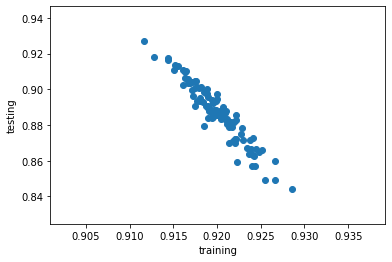

In [6]:
train = []
test = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    ols.fit(X_train,y_train)
    train.append(ols.score(X_train,y_train))
    test.append(ols.score(X_test,y_test))
print(
    '\nTraining average:',
    np.mean(train),
    '\nTesting average:',
    np.mean(test)
)


plt.scatter(train,test)
plt.xlabel('training')
plt.ylabel('testing')
plt.show()

#Training average: 0.9125977073905231 
#Testing average: 0.8562196917491026

#Training average: 0.9162656759980746 
#Testing average: 0.8709036270710832

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import houseprice_functions as hpf
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn import metrics

train_RMSE = []
test_RMSE = []
sd_ = np.linspace(1,8,60)
for i in list(sd_):
    cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
    HousePrices = pd.read_csv('data/train.csv')

    train_outliers = hpf.outlier_selecter(cleaned_hp,cleaned_hp,num_sd = i,min_unique = 20, drop_zeros = True)

    for col, idx in train_outliers.items():
        hpf.outlier_imputation(cleaned_hp, cleaned_hp,idx, col = col, method = "random", decimals = 2)

    y = HousePrices[["Id",'SalePrice']]
    x_y = cleaned_hp.merge(y,how = "inner",on = "Id")
    y = np.log(x_y['SalePrice'])
    X = x_y.drop(["Id","SalePrice","Ext_ImStucc", "Ext_Stone","House_2.5Fin"],axis = 1)


    all_cols = X.columns
    lis_ = []
    for col in all_cols:
        if len(X[col].unique()) == 2:
            continue
        else: 
            lis_.append(col)
    ###############
    #getting a list of all columns that are greater than 0.75 skew
    pos_skewed_feats =[]
    for col in lis_:
        if (X[col].skew() > 0.75):
            pos_skewed_feats.append(col)
    ################
    #creating a new dataframe, replacing the relevant columns with the transformed 
    X2 = X.copy()
    for col in all_cols:
        if col in pos_skewed_feats:
            X2[col] = np.log1p(X2[col])
    
    

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)


    en_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                            normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                            copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=1)
    en_model.fit(X2_train, y2_train)

    y_train_pred = en_model.predict(X2_train)
    y_pred = en_model.predict(X2_test)
    
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train_pred, y2_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_pred, y2_test))
    
    train_RMSE.append(train_rmse)
    test_RMSE.append(test_rmse)

C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Micha\Downloads\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

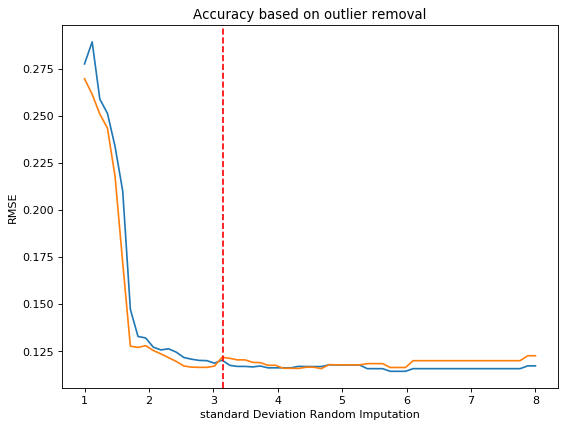

In [8]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sd_, test_RMSE)
plt.plot(sd_,train_RMSE)
plt.xlabel("standard Deviation Random Imputation")
plt.ylabel("RMSE")
plt.title("Accuracy based on outlier removal")
plt.axvline(3.15,linestyle="--",color = 'r')
plt.show()

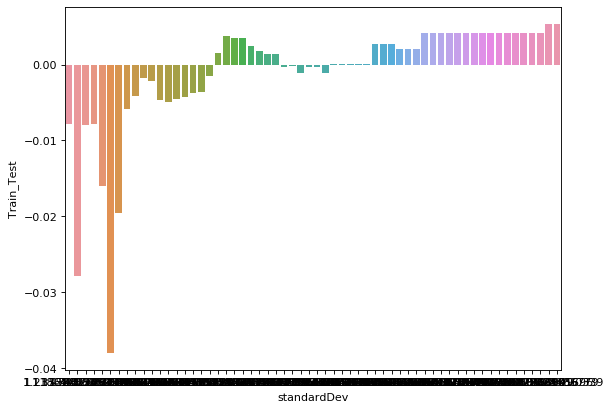

In [10]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

train_test_diff = []
for i in range(len(train_RMSE)):
    train_test_diff.append(train_RMSE[i] - test_RMSE[i])

    
x = pd.DataFrame(zip(sd_,train_test_diff),columns = ['standardDev','Train_Test'])
sns.barplot(x = x.standardDev,y = x.Train_Test)
plt.show()

In [11]:
cleaned_hp = pd.read_csv('data/cleaned_houseprice.csv')
HousePrices = pd.read_csv('data/train.csv')


cleaned_hp.loc[:,'finishedbsmt'].iloc[1298] #= 

0.9237315875613747

In [12]:
float(round(cleaned_hp['finishedbsmt'].sample(random_state = 1),2))

0.37

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
ols = linear_model.LinearRegression()
scores = cross_val_score(ols, X, y, cv=10)
predictions = cross_val_predict(ols, X, y, cv=10)
print(
    "RMSE:",
round(np.sqrt(metrics.mean_squared_error(y, predictions)),4)
)

RMSE: 0.1386
